In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()*100/891

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df.drop(['Age','Cabin','PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [6]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [7]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
df.dropna(inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [10]:
df.shape

(889, 7)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Embarked vs Survivors')

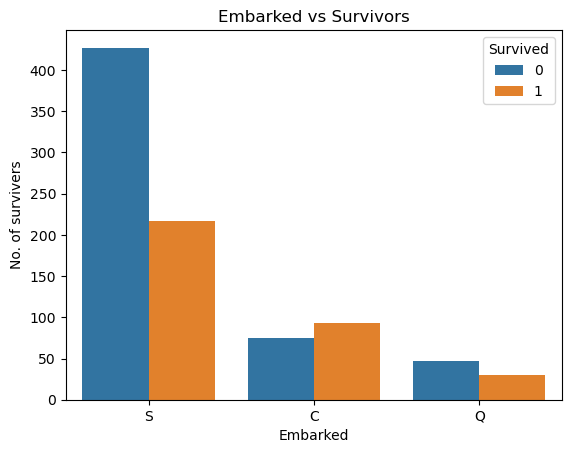

In [12]:
import seaborn as sns
 
sns.countplot(x = 'Embarked', hue = 'Survived',data = df)
plt.xlabel('Embarked')
plt.ylabel('No. of survivers')
plt.title('Embarked vs Survivors')

Text(0.5, 1.0, 'Survivors and its number on the basis of Sex')

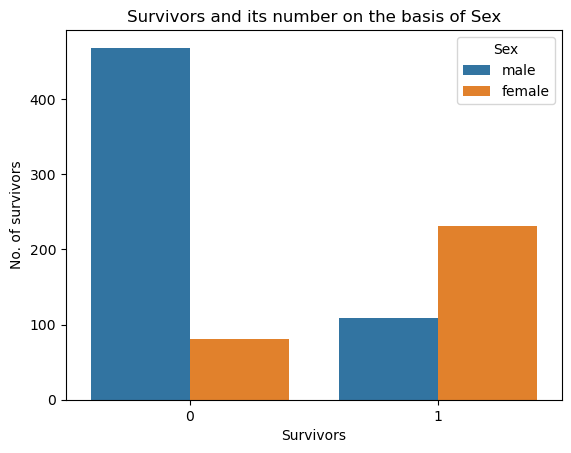

In [13]:
import plotly.express as px
sns.countplot(x = 'Survived', hue = 'Sex',data = df)
plt.xlabel('Survivors')
plt.ylabel('No. of survivors')
plt.title('Survivors and its number on the basis of Sex')

Text(0.5, 1.0, 'SibSp and No. of SipSp on the basis of Survived')

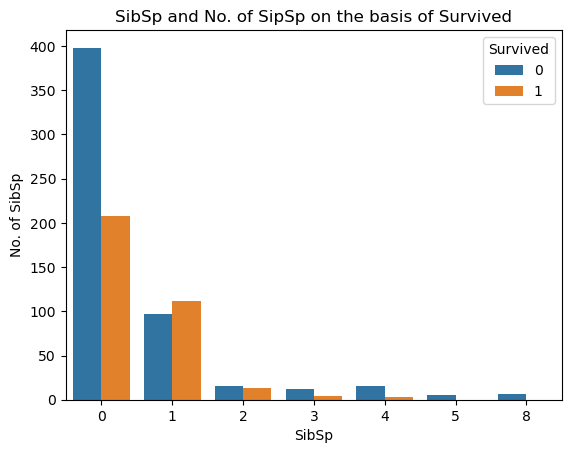

In [14]:
sns.countplot(x = 'SibSp', hue = 'Survived',data = df)
plt.xlabel('SibSp')
plt.ylabel('No. of SibSp')
plt.title('SibSp and No. of SipSp on the basis of Survived')

Text(0.5, 1.0, 'Pclass vs Survivors')

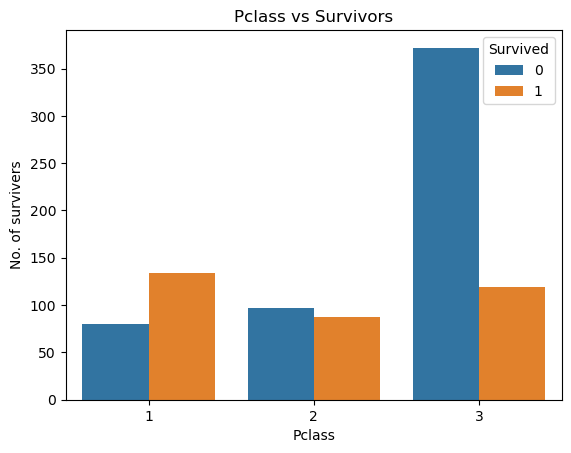

In [15]:
sns.countplot(x = 'Pclass', hue = 'Survived',data = df)
plt.xlabel('Pclass')
plt.ylabel('No. of survivers')
plt.title('Pclass vs Survivors')

Text(0.5, 1.0, 'Sex vs Survivors')

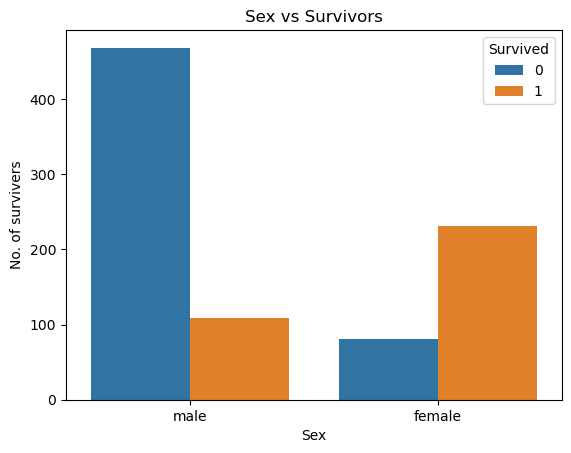

In [16]:
sns.countplot(x = 'Sex', hue = 'Survived',data = df)
plt.xlabel('Sex')
plt.ylabel('No. of survivers')
plt.title('Sex vs Survivors')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


In [18]:
df1 = df[df['Survived']==0]
df2 = df[df['Survived']==1]


In [19]:
print(df1['Fare'].sum())
print(df2['Fare'].sum())

12142.7199
16391.2294


<Axes: >

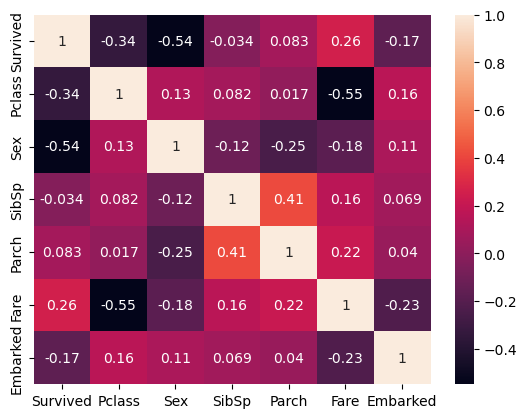

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
X = df.drop('Survived',axis=1)
Y = df['Survived']
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,Y,test_size=.3)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


model.fit(X,Y)

LogisticRegression()

In [23]:
df.shape

(889, 7)

In [24]:
X_train.shape

(622, 6)

In [27]:
X_test

732    0
395    0
528    0
629    0
27     0
      ..
338    1
889    1
695    0
667    0
539    1
Name: Survived, Length: 622, dtype: int64

In [26]:
print(model.predict([X_test]))

D:\all programs\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 622 features, but LogisticRegression is expecting 6 features as input.